In [50]:
import numpy as np
from typing import Tuple
import sys
import matplotlib.pyplot as plt
import skimage.transform
%load_ext autoreload
%autoreload 2

sys.path.append("../")
from training.util_prediction import get_coordinate_list
from spot_detection.models.util_augment import flip

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## import and display data 

In [84]:
dataset = "../data/pia_spots_c7016ca6.npz"
with np.load(dataset, allow_pickle=True) as data:
        train_x = data["x_train"]
        valid_x = data["x_valid"]
        test_x = data["x_test"]
        train_y = data["y_train"]
        valid_y = data["y_valid"]
        test_y = data["y_test"]

In [85]:
idx = 2
size = 200
image = train_x[idx]
image = image[:size,:size]
mask = train_y[idx]
mask = mask[:int(size/4),:int(size/4)]

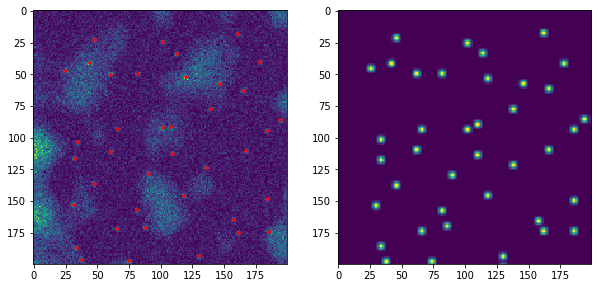

In [86]:
fig, ax = plt.subplots(1,2, figsize = (10,10))
ax[0].imshow(image)
coordList = get_coordinate_list(mask,512,128)
ax[0].scatter(coordList[...,0],coordList[...,1],marker="+",color='r',s=20)

ax[1].imshow(skimage.transform.resize(mask[...,0], (size,size)))

## Flip

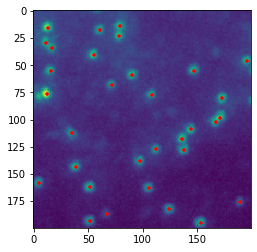

In [67]:
new_img, new_mask = flip(image,mask)
plt.imshow(new_img)
coordList = get_coordinate_list(new_mask,512,128)
plt.scatter(coordList[...,0],coordList[...,1],marker="+",color='r',s=10)
plt.show()